# `Tesseract-OCR`


---


*By. Richie-Z*

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

In [ ]:
from google.colab import files
files.download("./image_frames/frame473.png")

In [4]:
import requests  
file_url = "https://raw.githubusercontent.com/tesseract-ocr/tessdata/4.00/ind.traineddata"
    
r = requests.get(file_url, stream = True)  
  
with open("/usr/share/tesseract-ocr/4.00/tessdata/ind.traineddata", "wb") as file:  
    for block in r.iter_content(chunk_size = 1024): 
         if block:  
             file.write(block)  

In [ ]:
url = "https://i.stack.imgur.com/2lAK2.png"
r=requests.get(url,stream=True)
with open ("2.png","wb")as file:
  for block in r.iter_content(chunk_size = 1024):
    if block:
      file.write(block)

# Library and Dependency

In [1]:
#@title Step 1
! apt install tesseract-ocr libtesseract-dev libmagickwand-dev
from IPython.display import HTML, clear_output
clear_output()
print("STEP 1 Done")

STEP 1 Done


In [2]:
#@title Step 2
! pip install pytesseract wand opencv-python
clear_output()
print("STEP 2 Done")

STEP 2 Done


In [3]:
#@title Step 3
from PIL import Image
import pytesseract
from wand.image import Image as Img
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import numpy as np
import os
import cv2
from datetime import timedelta
from matplotlib import pyplot as plt
import shutil
import datetime
import codecs
import sys
import json
import progressbar
from tqdm.auto import tqdm

clear_output()
print("STEP 3 Done")

STEP 3 Done


# Image to String

In [ ]:
try:
  img=Image.open('hasil.png')
  text=pytesseract.image_to_string(img,lang="ind")
  characters_to_remove = "!()@—*“>+-/,'|£#%$&^_~"
  new_string = text
  for character in characters_to_remove:
    new_string = new_string.replace(character, "")
  print(new_string)
except IOError as e:
    print("Error (%s)." % e)

untuk mengenyam pendidikan
serta praktik dalam pertanian.


In [ ]:
img=Image.open('frame.png')
custom_config = r'-l ind --oem 3 --psm 6' 
text = pytesseract.image_to_string(img,config=custom_config)
print(text)

# Video Subtitle to String

In [8]:
#@title <b>Estrack Frame
if not os.path.exists('image_frames'):
    os.makedirs('image_frames')
path = '/content/drive/My Drive/Otakudesu_GinSaji--01_720p_BD_cut_001.mp4' #@param {type:"string"}
video = cv2.VideoCapture(path)
index = 0
while video.isOpened():
    ret,frame = video.read()
    if not ret:
        break
    name = './image_frames/frame' + str(index) + '.png'
    print ('Extracting frames...' + name)
    cv2.imwrite(name, frame[550:800, 50:1200])
    index = index + 1
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()
  
clear_output()
file_count = sum(len(files) for _, _, files in os.walk(r'./image_frames'))
print("Total Frame : "+str(file_count))

Total Frame : 2907


In [ ]:
#@title <b>Clean TXT</b> (Slow Method)
#@markdown 
#@markdown <p> for better result use this
if not os.path.exists('cleantxt'):
    os.makedirs('cleantxt')
for a in tqdm(range(file_count)):
  img= cv2.imread("./image_frames/frame"+str(a)+".png")
  mask = np.zeros(img.shape[:2],np.uint8)
  bgdModel = np.zeros((1,65), np.float64)
  fgdModel = np.zeros((1,65), np.float64)
  rect = (330,40,600, 100)
  cv2.grabCut(img,mask,rect,bgdModel,fgdModel, 5 , cv2.GC_INIT_WITH_RECT)
  mask2 = np.where((mask==2)| (mask==0), 0,1).astype('uint8')
  img = img*mask2[:,:,np.newaxis]
  cv2.imwrite("./cleantxt/cleantxt"+str(a)+".png",img)
  print(" ",end='\r')

clear_output()
print("Clean TXT done")

In [ ]:
#@title <b>OCR
fps = 24.0
kosong = ""
def get_srt_timestamp(frame_index: int, fps: float):
	td = datetime.timedelta(seconds=frame_index / fps)
	ms = td.microseconds // 1000
	m, s = divmod(td.seconds, 60)
	h, m = divmod(m, 60)
	return '{:02d}:{:02d}:{:02d},{:03d}'.format(h, m, s, ms)
 
for i in range(file_count):
	asu= get_srt_timestamp(i,fps)
	mmq = Image.open("./cleantxt/cleantxt"+ str(i)+".png")
	custom_config = r'-l ind' #@param {type:"string"}
	text = pytesseract.image_to_string(mmq,config=custom_config)
##remove tesseract error
	characters_to_remove = "!()@—*“>+-/,'|£#%$&^_~"
	new_string = text
	for character in characters_to_remove:
		new_string = new_string.replace(character, "")
	if text != kosong :
		print("frame"+str(i)+" "+str(asu)+ ":" + new_string) 

# Check FPS and Posistioning CROP

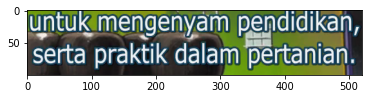

In [ ]:
import cv2 as c
import matplotlib.pyplot as plt

img = c.imread("ori.png")
crop = img[40:140, 330:850]
plt.imshow(crop)
plt.show()

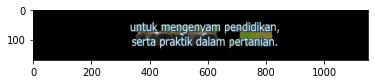

True

In [ ]:
img= cv2.imread("ori.png")
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)
rect = (330,40,600, 100)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel, 5 , cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)| (mask==0), 0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img)
plt.show()

cv2.imwrite("hasil.png",img)

In [ ]:
from datetime import timedelta

FPS = 24.0
frame_count = 2907
td = timedelta(seconds=(frame_count / FPS))
print(td)

0:02:01.125000
